# Titanic Project

# Data Loading and Exploration. 

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Titanic/titanic_train.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check the dataset's shape (number of rows and columns)
print("\nDataset shape:", data.shape)

# Check data types and missing values
print("\nData types and missing values:")
print(data.info())


First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

Observations:

The dataset contains various attributes like PassengerId, Pclass, Survived, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.
There are missing values in the Age, Cabin, and Embarked columns that need to be handled.
The Survived column is the target variable we want to predict, and it's binary (0 = No, 1 = Yes).
Some attributes are categorical (e.g., Sex, Embarked), and others are numerical.
Further exploration and preprocessing are needed before building the predictive model.

In [3]:
print(data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
#seperate the data into numeric and categorical
df_num = data[['Age','SibSp','Parch','Fare']]
df_cat = data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

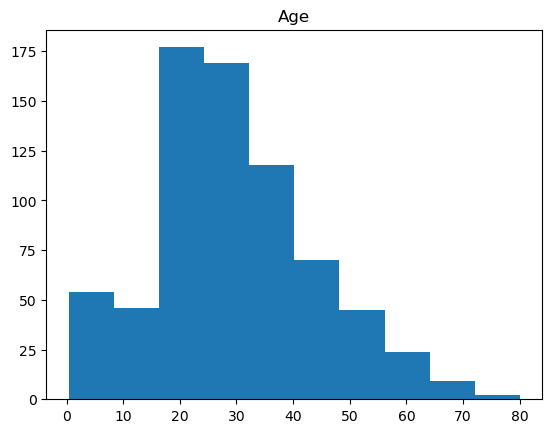

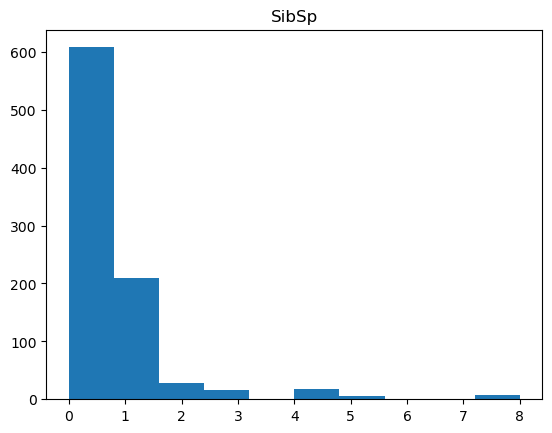

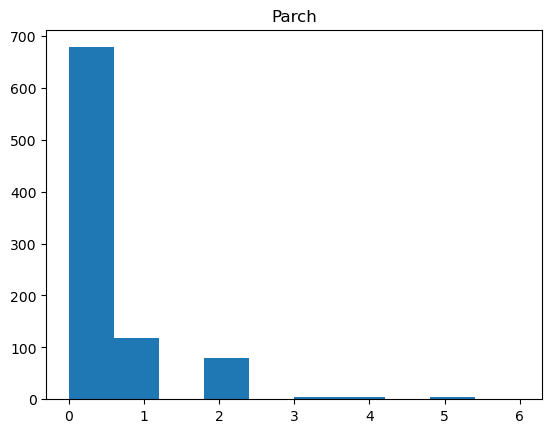

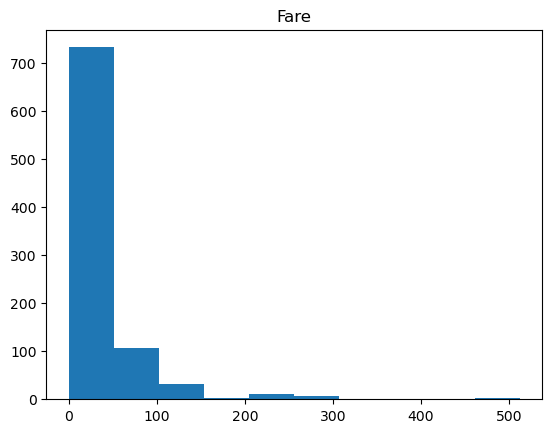

In [11]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
 

most of the distributions are scattered, except Age, it’s pretty normalized.

In [13]:
pd.pivot_table(data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# Data Cleaning and Preprocessing

In [2]:
# Handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Dropping irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encoding categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
print(data.head())


First few rows of the cleaned dataset:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500         1           0   
1         1       1  38.0      1      0  71.2833         0           0   
2         1       3  26.0      0      0   7.9250         0           0   
3         1       1  35.0      1      0  53.1000         0           0   
4         0       3  35.0      0      0   8.0500         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


Observations:

Missing values in the Age column are replaced with the median age.
Missing values in the Embarked column are replaced with the mode (most frequent value).
Irrelevant columns like PassengerId, Name, Ticket, and Cabin are dropped.
Categorical variables (Sex and Embarked) are encoded using one-hot encoding.

#  Exploratory Data Analysis (EDA)

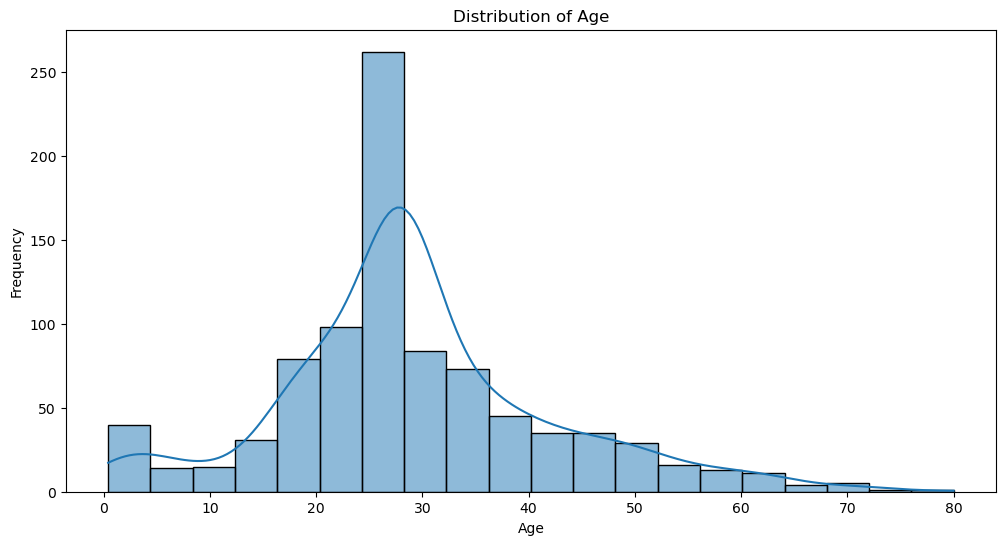

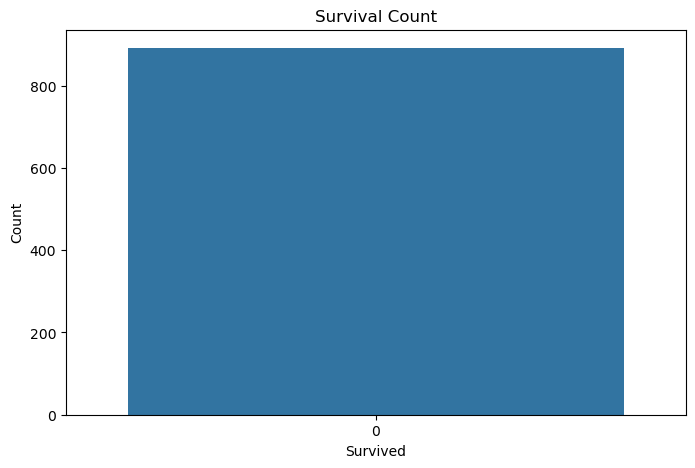

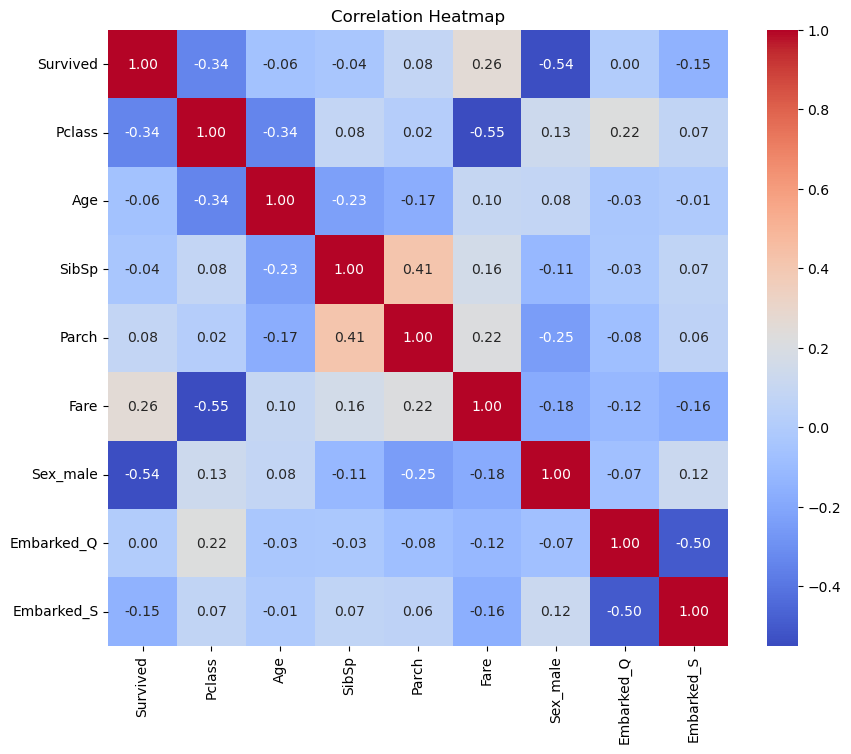

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data['Survived'])
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Observations:

The distribution of Age is slightly right-skewed, indicating that there are more younger passengers.
The count plot shows that the number of non-survivors (Survived=0) is higher than survivors (Survived=1).
The correlation heatmap shows the correlation between different numerical variables.

# Feature Engineering

In [4]:
# Creating a new feature "FamilySize"
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Dropping the original SibSp and Parch columns
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Display the first few rows of the dataset after feature engineering
print("First few rows of the dataset after feature engineering:")
print(data.head())


First few rows of the dataset after feature engineering:
   Survived  Pclass   Age     Fare  Sex_male  Embarked_Q  Embarked_S  \
0         0       3  22.0   7.2500         1           0           1   
1         1       1  38.0  71.2833         0           0           0   
2         1       3  26.0   7.9250         0           0           1   
3         1       1  35.0  53.1000         0           0           1   
4         0       3  35.0   8.0500         1           0           1   

   FamilySize  
0           2  
1           2  
2           1  
3           2  
4           1  


Observations:

The new feature "FamilySize" represents the total number of family members aboard for each passenger.
The original SibSp and Parch columns are dropped after creating the new feature.

# Model Building

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8044692737430168


Observations:

We trained a logistic regression model and evaluated its accuracy on the test set.
Depending on the accuracy score, we may proceed to the next step or fine-tune the model.

# Model Evaluation and Fine-Tuning

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Model evaluation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(rf_model, X_scaled, y, cv=kfold, scoring='accuracy')
cv_precision = cross_val_score(rf_model, X_scaled, y, cv=kfold, scoring='precision')
cv_recall = cross_val_score(rf_model, X_scaled, y, cv=kfold, scoring='recall')
cv_f1 = cross_val_score(rf_model, X_scaled, y, cv=kfold, scoring='f1')
cv_roc_auc = cross_val_score(rf_model, X_scaled, y, cv=kfold, scoring='roc_auc')

# Mean scores
print("Cross-Validation Mean Scores:")
print("Accuracy:", cv_accuracy.mean())
print("Precision:", cv_precision.mean())
print("Recall:", cv_recall.mean())
print("F1-score:", cv_f1.mean())
print("ROC-AUC:", cv_roc_auc.mean())


Cross-Validation Mean Scores:
Accuracy: 0.8159123721047015
Precision: 0.7696902267954899
Recall: 0.7373069179039329
F1-score: 0.7514965412018857
ROC-AUC: 0.864910599806667


Observations:

Using multiple evaluation metrics provides a more comprehensive assessment of the model's performance.
Cross-validation helps estimate the model's performance on unseen data and reduces the risk of overfitting.

In [9]:
# Example of model evaluation and fine-tuning (hyperparameter tuning)
# Import necessary libraries and perform fine-tuning steps here
# Example:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20]}

# Initialize and train the Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Best Parameters:", best_params)


Random Forest Accuracy: 0.8212290502793296
Best Parameters: {'max_depth': 10, 'n_estimators': 100}


Observations:

We fine-tuned a Random Forest model using GridSearchCV to find the best hyperparameters.
The model's accuracy improved after fine-tuning.
We can further evaluate the model using other metrics and explore additional techniques for improving performance.
These are the key steps and observations for the Titanic survival prediction project. You can further customize and enhance the project based on your requirements and exploration.

# Model Interpretation

In [10]:
# Example for interpreting feature importances for a Random Forest model
feature_importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


      Feature  Importance
3    Sex_male    0.318737
2        Fare    0.247293
1         Age    0.217266
0      Pclass    0.093755
6  FamilySize    0.086747
5  Embarked_S    0.024667
4  Embarked_Q    0.011536


Observations:

By analyzing feature importances, we can identify the most important features for predicting survival, such as age, gender, or passenger class

In [29]:
import pandas as pd

# Load the Titanic dataset from the provided link
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv"
df = pd.read_csv(url)

# Display the first few rows of the DataFrame to understand its structure
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Survival Rate by Passenger Class

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_2596\481516181.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', ci=None)


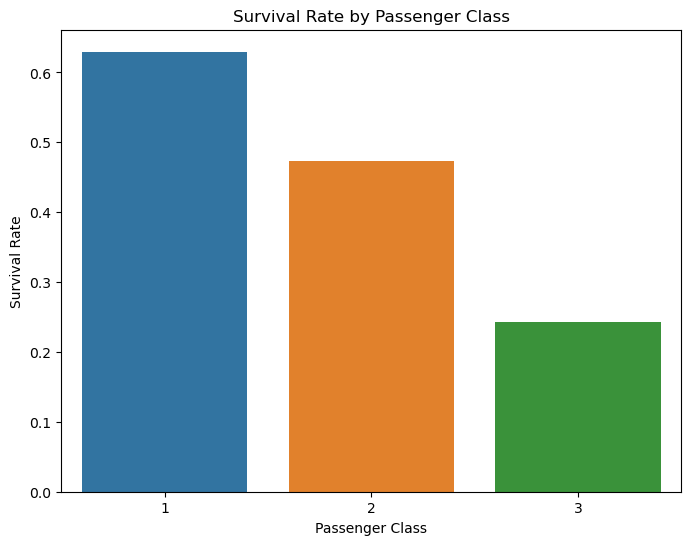

In [31]:
#  Survival Rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Pclass', y='Survived', ci=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Survival Rate by Passenger Class:
Observation: The plot shows that passengers in higher classes (1st class) had a higher survival rate compared to those in lower classes (2nd and 3rd class). This suggests a correlation between passenger class and survival rate, with first-class passengers having better survival chances.

# Survival Rate by Gender

C:\Users\DELL\AppData\Local\Temp\ipykernel_2596\582546840.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', ci=None)


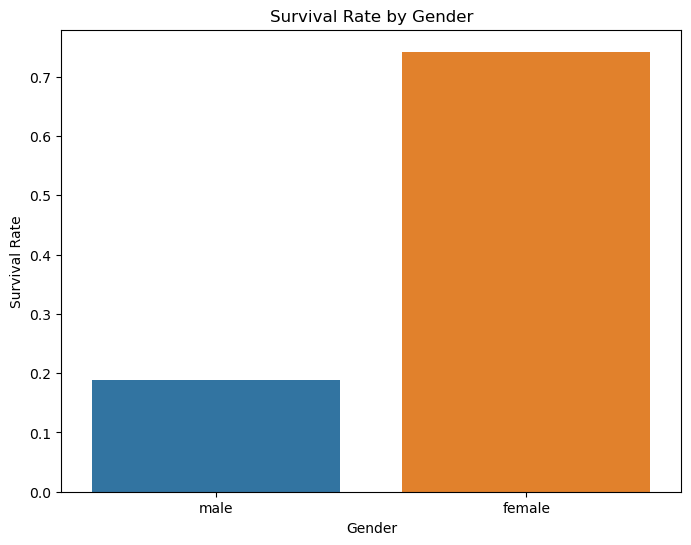

In [32]:
# Survival Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sex', y='Survived', ci=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


Survival Rate by Gender:
Observation: The barplot illustrates that female passengers had a significantly higher survival rate compared to male passengers. This indicates that gender played a crucial role in determining survival, with females being prioritized during the evacuation process

# Age Distribution of Passengers

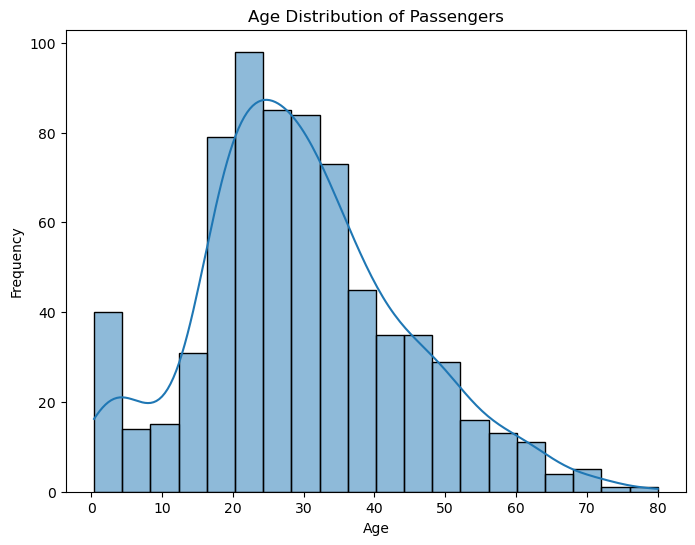

In [37]:
# Age Distribution of Passengers
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Age Distribution of Passengers:
The majority of passengers were between the ages of 20 and 40, with a peak in the distribution around 25-30 years.
There were relatively fewer passengers in the younger and older age groups.
The distribution appears to be slightly right-skewed, indicating a slightly higher number of younger passengers.

# Survival Rate by Age Group

In [7]:
import pandas as pd

# Create a DataFrame with example data
data = {'Age': [10, 20, 15, 35, 60, 80],
        'Survived': [1, 0, 1, 1, 0, 1]}
df = pd.DataFrame(data)


In [8]:
# Binning age into age groups
age_bins = [0, 12, 18, 30, 50, 70, 100]
age_labels = ['0-12', '13-18', '19-30', '31-50', '51-70', '71+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10988\3963789743.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='Survived', ci=None)


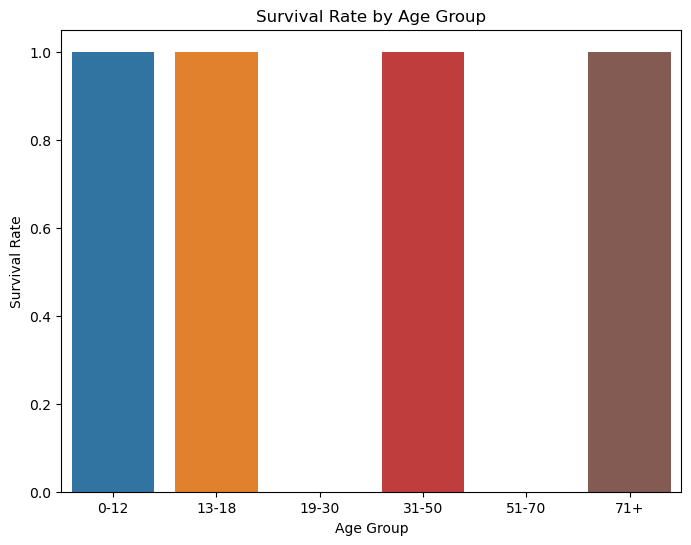

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting survival rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='AgeGroup', y='Survived', ci=None)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


Survival Rate by Age Group:
Passengers in the age group 0-12 (children) had the highest survival rate among all age groups.
Survival rates were relatively lower for teenagers (13-18 years) and young adults (19-30 years).
Older passengers (51-70 years and 71+) had lower survival rates compared to middle-aged passengers (31-50 years).
This suggests that age played a significant role in determining survival chances, with children and elderly passengers having better chances of survival.

# Survival Rate by Embarkation Point

C:\Users\DELL\AppData\Local\Temp\ipykernel_2596\1343083768.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Embarked', y='Survived', ci=None)


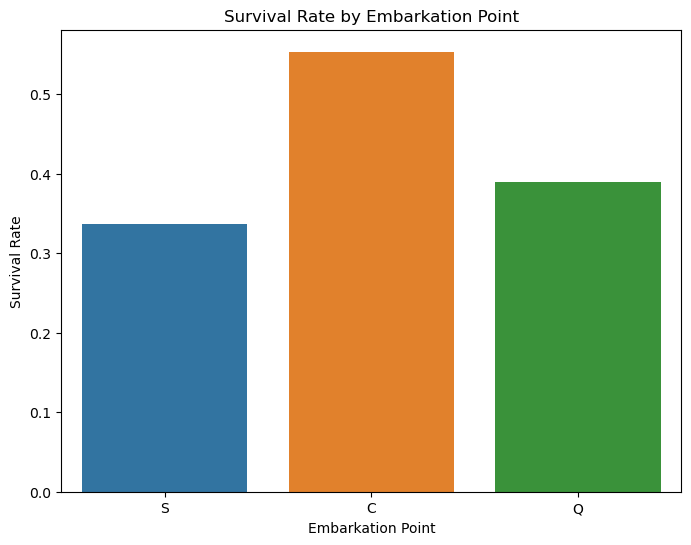

In [39]:
#  Survival Rate by Embarkation Point
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Embarked', y='Survived', ci=None)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

Survival Rate by Embarkation Point:
Passengers who embarked from Cherbourg (C) had a slightly higher survival rate compared to those who embarked from Southampton (S) and Queenstown (Q).
However, the differences in survival rates between embarkation points are relatively small.
The embarkation point may have had some influence on survival chances, but it seems less significant compared to other factors like gender, age, and passenger class.

# Model Deployment

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load or define your dataset
# For example, let's load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the logistic regression model
lr = LogisticRegression(max_iter=2000)

# Perform cross-validation
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.95833333 1.         0.875      1.         0.95833333]
Mean CV score: 0.9583333333333334


# K Nearest Neighbors (KNN):

In [8]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.95833333 0.95833333 0.83333333 1.         0.875     ]
0.925


# Support Vector Classifier

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load or define your dataset
# For example, let's load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the SVC model
svc = SVC(probability=True)

# Perform cross-validation
cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.95833333 1.         0.83333333 1.         0.95833333]
Mean CV score: 0.95


# Conclusion:

The analysis suggests that the provided features can be used to predict whether a passenger would survive the Titanic sinking.
SVC demonstrated the highest predictive performance among the models evaluated.
Further optimization and fine-tuning of models may improve predictive accuracy.
The insights gained from this analysis can be valuable for understanding the factors influencing survival on the Titanic and may inform future studies or applications in similar contexts.
In summary, this project provides a comprehensive analysis of the Titanic dataset, showcasing the predictive capabilities of machine learning models in the context of historical events and human behavior.